In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

import lightgbm as lgb

from sklearn.metrics import r2_score, mean_squared_error
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
MODEL_PATH = "/content/drive/Shared drives/CMPE-255/Trained Models"
DATASET2_PATH = "/content/drive/Shared drives/CMPE-255/final_df.csv"
FB_DATA_PATH = "/content/drive/Shared drives/CMPE-255/fb_status_data.csv"

In [3]:
df = pd.read_csv(DATASET2_PATH, encoding="ISO-8859-1")
X_df = df['status_update']
y_df = df.drop(['userid', 'status_update'], axis=1)
print(X_df.shape, y_df.shape)

(560237,) (560237, 5)


In [0]:
fb_status_dataset = pd.read_csv(FB_DATA_PATH, encoding="ISO-8859-1")
X_test = fb_status_dataset['STATUS']
drop_list = ['#AUTHID', 'STATUS', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']
#print(list_)
y_test = fb_status_dataset.drop(drop_list, axis=1)

In [0]:
#model 2: Light GBM
params = {
        'boosting' : 'dart',
        'application': 'regression',
        'max_depth': 10,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE'}

es = lgb.early_stopping(stopping_rounds=10, verbose=True)
print_ev = lgb.print_evaluation(period=1, show_stdv=True)
#rate_decay = lgb.reset_parameter(learning_rate = lambda current_round: 0.01 * current_round)


In [0]:
traits = ['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']
y_pred = {}
y_pred_train = {}
tfidf = TfidfVectorizer(stop_words='english', strip_accents='ascii')
X = tfidf.fit_transform(X_df.values.astype('U'))
X_t = tfidf.transform(X_test.values.astype('U'))

[1]	valid_0's rmse: 0.636583
[1]	valid_0's rmse: 0.636583


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.6364
[2]	valid_0's rmse: 0.6364
[3]	valid_0's rmse: 0.636279
[3]	valid_0's rmse: 0.636279
[4]	valid_0's rmse: 0.636216
[4]	valid_0's rmse: 0.636216
[5]	valid_0's rmse: 0.636058
[5]	valid_0's rmse: 0.636058
[6]	valid_0's rmse: 0.635929
[6]	valid_0's rmse: 0.635929
[7]	valid_0's rmse: 0.635897
[7]	valid_0's rmse: 0.635897
[8]	valid_0's rmse: 0.635952
[8]	valid_0's rmse: 0.635952
[9]	valid_0's rmse: 0.635825
[9]	valid_0's rmse: 0.635825
[10]	valid_0's rmse: 0.635754
[10]	valid_0's rmse: 0.635754
[11]	valid_0's rmse: 0.635679
[11]	valid_0's rmse: 0.635679
[12]	valid_0's rmse: 0.635703
[12]	valid_0's rmse: 0.635703
[13]	valid_0's rmse: 0.635645
[13]	valid_0's rmse: 0.635645
[14]	valid_0's rmse: 0.635591
[14]	valid_0's rmse: 0.635591
[15]	valid_0's rmse: 0.635565
[15]	valid_0's rmse: 0.635565
[16]	valid_0's rmse: 0.635517
[16]	valid_0's rmse: 0.635517
[17]	valid_0's rmse: 0.635462
[17]	valid_0's rmse: 0.635462
[18]	valid_0's rmse: 0.635425
[18]	valid_0's rmse: 0.635425


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.737692
[2]	valid_0's rmse: 0.737692
[3]	valid_0's rmse: 0.737668
[3]	valid_0's rmse: 0.737668
[4]	valid_0's rmse: 0.737637
[4]	valid_0's rmse: 0.737637
[5]	valid_0's rmse: 0.737598
[5]	valid_0's rmse: 0.737598
[6]	valid_0's rmse: 0.737568
[6]	valid_0's rmse: 0.737568
[7]	valid_0's rmse: 0.737627
[7]	valid_0's rmse: 0.737627
[8]	valid_0's rmse: 0.737612
[8]	valid_0's rmse: 0.737612
[9]	valid_0's rmse: 0.737633
[9]	valid_0's rmse: 0.737633
[10]	valid_0's rmse: 0.737602
[10]	valid_0's rmse: 0.737602
[11]	valid_0's rmse: 0.737623
[11]	valid_0's rmse: 0.737623
[12]	valid_0's rmse: 0.737609
[12]	valid_0's rmse: 0.737609
[13]	valid_0's rmse: 0.737628
[13]	valid_0's rmse: 0.737628
[14]	valid_0's rmse: 0.737548
[14]	valid_0's rmse: 0.737548
[15]	valid_0's rmse: 0.737615
[15]	valid_0's rmse: 0.737615
[16]	valid_0's rmse: 0.737631
[16]	valid_0's rmse: 0.737631
[17]	valid_0's rmse: 0.737555
[17]	valid_0's rmse: 0.737555
[18]	valid_0's rmse: 0.737581
[18]	valid_0's rmse: 0.737

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.893704
[2]	valid_0's rmse: 0.893704
[3]	valid_0's rmse: 0.893618
[3]	valid_0's rmse: 0.893618
[4]	valid_0's rmse: 0.893483
[4]	valid_0's rmse: 0.893483
[5]	valid_0's rmse: 0.893312
[5]	valid_0's rmse: 0.893312
[6]	valid_0's rmse: 0.893241
[6]	valid_0's rmse: 0.893241
[7]	valid_0's rmse: 0.893225
[7]	valid_0's rmse: 0.893225
[8]	valid_0's rmse: 0.893257
[8]	valid_0's rmse: 0.893257
[9]	valid_0's rmse: 0.893047
[9]	valid_0's rmse: 0.893047
[10]	valid_0's rmse: 0.893027
[10]	valid_0's rmse: 0.893027
[11]	valid_0's rmse: 0.892949
[11]	valid_0's rmse: 0.892949
[12]	valid_0's rmse: 0.892977
[12]	valid_0's rmse: 0.892977
[13]	valid_0's rmse: 0.892852
[13]	valid_0's rmse: 0.892852
[14]	valid_0's rmse: 0.892842
[14]	valid_0's rmse: 0.892842
[15]	valid_0's rmse: 0.892746
[15]	valid_0's rmse: 0.892746
[16]	valid_0's rmse: 0.89271
[16]	valid_0's rmse: 0.89271
[17]	valid_0's rmse: 0.892635
[17]	valid_0's rmse: 0.892635
[18]	valid_0's rmse: 0.892532
[18]	valid_0's rmse: 0.89253

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.684688
[2]	valid_0's rmse: 0.684688
[3]	valid_0's rmse: 0.684636
[3]	valid_0's rmse: 0.684636
[4]	valid_0's rmse: 0.684609
[4]	valid_0's rmse: 0.684609
[5]	valid_0's rmse: 0.68457
[5]	valid_0's rmse: 0.68457
[6]	valid_0's rmse: 0.68457
[6]	valid_0's rmse: 0.68457
[7]	valid_0's rmse: 0.684522
[7]	valid_0's rmse: 0.684522
[8]	valid_0's rmse: 0.684535
[8]	valid_0's rmse: 0.684535
[9]	valid_0's rmse: 0.684484
[9]	valid_0's rmse: 0.684484
[10]	valid_0's rmse: 0.68447
[10]	valid_0's rmse: 0.68447
[11]	valid_0's rmse: 0.684482
[11]	valid_0's rmse: 0.684482
[12]	valid_0's rmse: 0.684478
[12]	valid_0's rmse: 0.684478
[13]	valid_0's rmse: 0.684494
[13]	valid_0's rmse: 0.684494
[14]	valid_0's rmse: 0.684468
[14]	valid_0's rmse: 0.684468
[15]	valid_0's rmse: 0.684424
[15]	valid_0's rmse: 0.684424
[16]	valid_0's rmse: 0.684402
[16]	valid_0's rmse: 0.684402
[17]	valid_0's rmse: 0.684361
[17]	valid_0's rmse: 0.684361
[18]	valid_0's rmse: 0.684338
[18]	valid_0's rmse: 0.684338
[1

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.780963
[2]	valid_0's rmse: 0.780963
[3]	valid_0's rmse: 0.781006
[3]	valid_0's rmse: 0.781006
[4]	valid_0's rmse: 0.781029
[4]	valid_0's rmse: 0.781029
[5]	valid_0's rmse: 0.781072
[5]	valid_0's rmse: 0.781072
[6]	valid_0's rmse: 0.781088
[6]	valid_0's rmse: 0.781088
[7]	valid_0's rmse: 0.781032
[7]	valid_0's rmse: 0.781032
[8]	valid_0's rmse: 0.781025
[8]	valid_0's rmse: 0.781025
[9]	valid_0's rmse: 0.780991
[9]	valid_0's rmse: 0.780991
[10]	valid_0's rmse: 0.780978
[10]	valid_0's rmse: 0.780978
[11]	valid_0's rmse: 0.78101
[11]	valid_0's rmse: 0.78101
[12]	valid_0's rmse: 0.780991
[12]	valid_0's rmse: 0.780991
[13]	valid_0's rmse: 0.780937
[13]	valid_0's rmse: 0.780937
[14]	valid_0's rmse: 0.78092
[14]	valid_0's rmse: 0.78092
[15]	valid_0's rmse: 0.78084
[15]	valid_0's rmse: 0.78084
[16]	valid_0's rmse: 0.780845
[16]	valid_0's rmse: 0.780845
[17]	valid_0's rmse: 0.780848
[17]	valid_0's rmse: 0.780848
[18]	valid_0's rmse: 0.780802
[18]	valid_0's rmse: 0.780802
[1

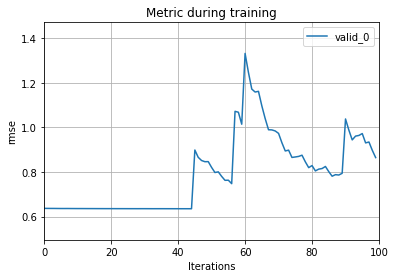

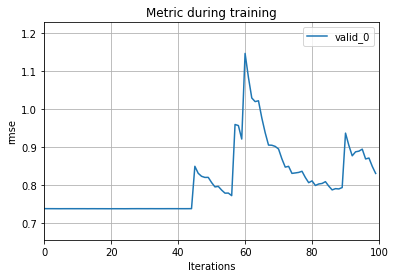

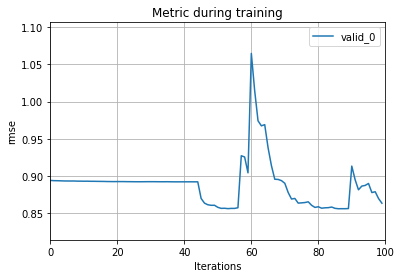

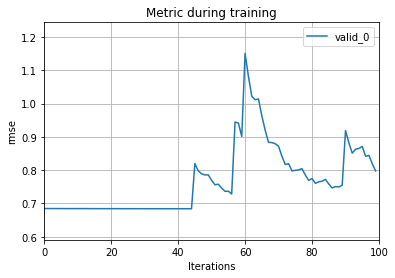

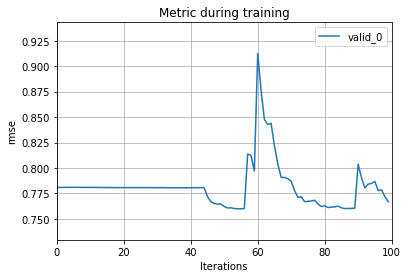

In [10]:
for trait in traits:
  evals_result = {}

  train_set = lgb.Dataset(X, y_df[trait])
  test_set = lgb.Dataset(X_t, y_test[trait])

  model2_lb = lgb.train(params, train_set = train_set, valid_sets = test_set, num_boost_round=100, evals_result=evals_result, callbacks=[es, print_ev])
  
  y_pred[trait] = model2_lb.predict(X_t, num_iteration = model2_lb.best_iteration)
  val_score = r2_score(y_test[trait], y_pred[trait])
  mse = mean_squared_error(y_test[trait], y_pred[trait])

  y_pred_train[trait] = model2_lb.predict(X, num_iteration = model2_lb.best_iteration)
  val_score_train = r2_score(y_df[trait], y_pred_train[trait])
  mse_train = mean_squared_error(y_df[trait], y_pred_train[trait])

  print("r2_score_test : ", val_score)
  print("r2_score_train : ", val_score_train)
  print("MSE_test : ", mse)
  print("MSE_train : ", mse_train)

  lgb.plot_metric(evals_result)
  '''
  with open(MODEL_PATH + 'ridgeReg/' + trait + '_model_lr.pkl', 'wb') as f:
            # Write the model to a file.
    pickle.dump(model1, f)
  '''